In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/Users/mwp52/Downloads/McDonald_s_Reviews.csv", encoding = 'latin-1')
print(df.head())

   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  int64  
 10  liked          33396 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.8+ MB


NameError: name 'plt' is not defined

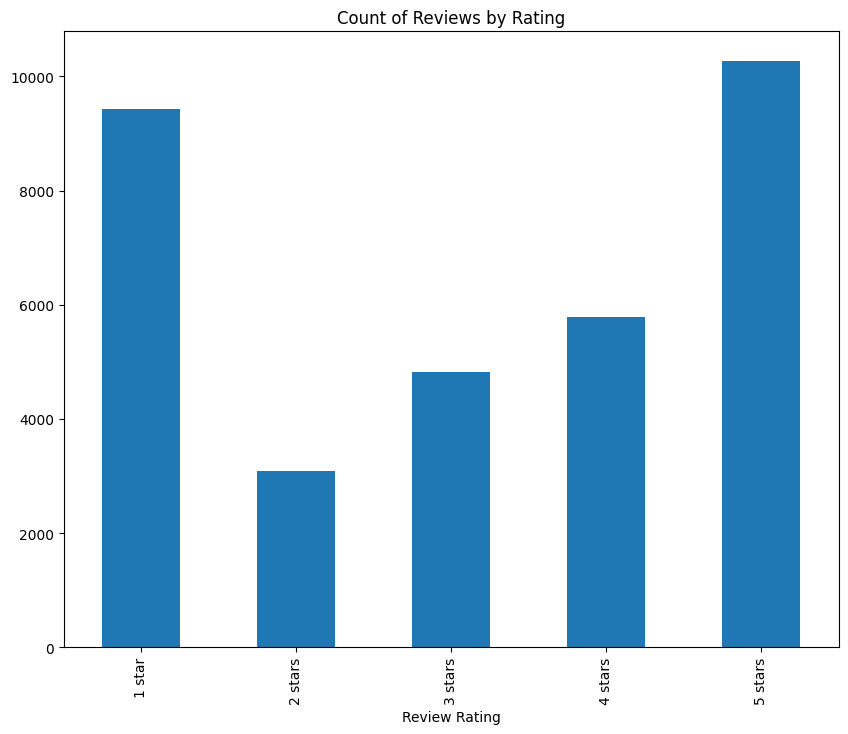

In [6]:
ax = df['rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Rating', figsize = (10, 8))
ax.set_xlabel('Review Rating')
plt.show()

In [7]:
df['rating'] = df['rating'].str.split().str[0].astype(int)
df['rating'].head()

0    1
1    4
2    1
3    5
4    1
Name: rating, dtype: int64

In [8]:
def categorize(data):
    if data['rating'] >= 3:
        return 1
    else:
        return 0

df['liked'] = df.apply(categorize, axis = 1)

df.sample(10)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,liked
23634,23635,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,"1,617",3 years ago,This has been one of the worst McDonald's I ha...,1,0
13989,13990,McDonald's,Fast food restaurant,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",28.450387,-81.471414,"19,671",3 years ago,"This place is massive, and a mad house! It was...",3,1
13814,13815,McDonald's,Fast food restaurant,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",28.450387,-81.471414,"19,671",3 weeks ago,Used a ice cream cone reward. The machine was ...,1,0
10309,10310,McDonald's,Fast food restaurant,"690 Alameda St, Los Angeles, CA 90021, United ...",34.035270,-118.238206,"2,614",4 years ago,McDonalds is my favorite place for the frappe ...,5,1
1870,1871,McDonald's,Fast food restaurant,"72-69 Kissena Blvd, Queens, NY 11367, United S...",40.727401,-73.812460,"2,193",2 months ago,Fast and clean. Good parking and area. Why not.,5,1
29697,29698,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,"1,618",4 years ago,Excellent,5,1
19464,19465,McDonald's,Fast food restaurant,"621 Broadway, Newark, NJ 07104, United States",40.771910,-74.161475,"1,564",a year ago,They don't have restroom for customer!!!!\nYou...,1,0
23446,23447,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,566",a year ago,Tortillas stale and why ask if I want sauce if...,1,0
25818,25819,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,"2,657",2 years ago,"Awesome breakfast, quick and easy service.",5,1
30946,30947,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",28.423814,-81.461242,"5,468",4 years ago,Order of fries and a cup of coffee. Ordered o...,1,0


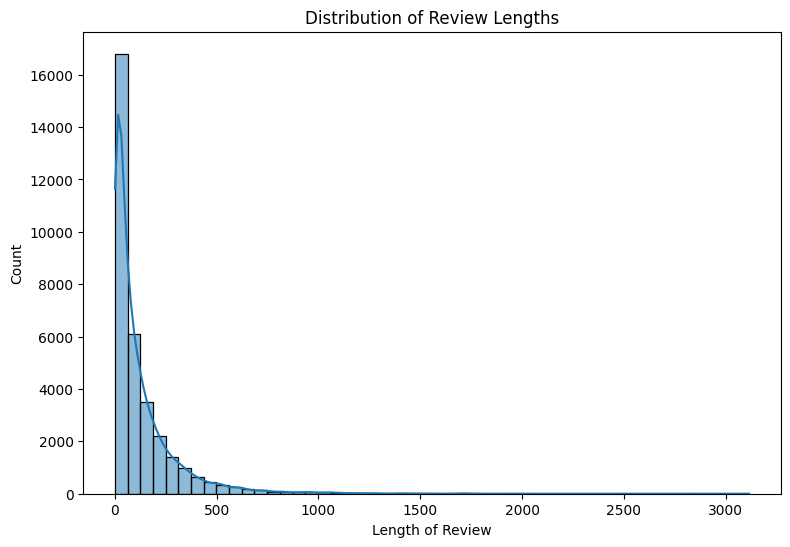

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the length of each review
df['Review Length'] = df['review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

In [18]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
df['Sentiment'] = df['review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(df.head())

   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

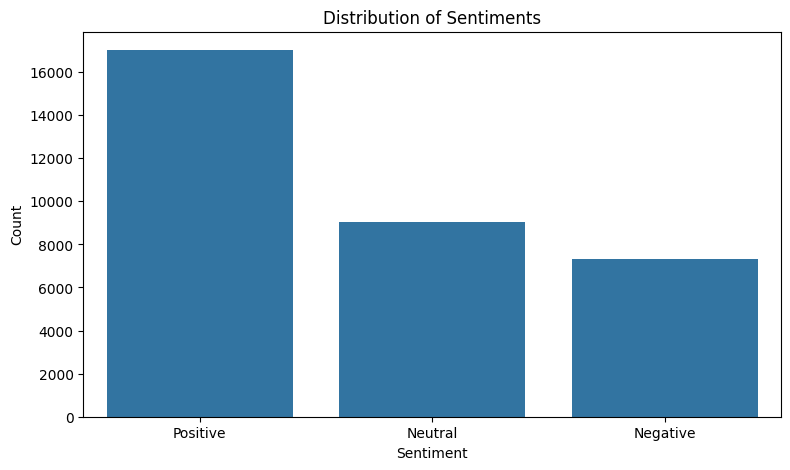

In [19]:
# Analyzing the distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

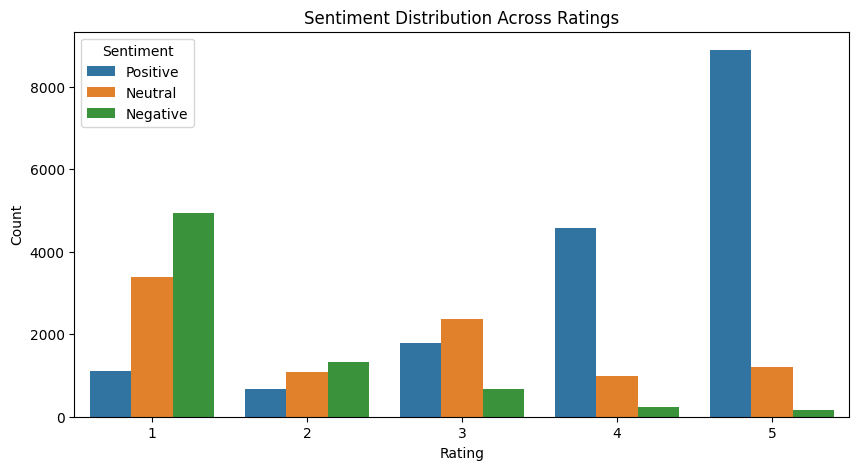

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

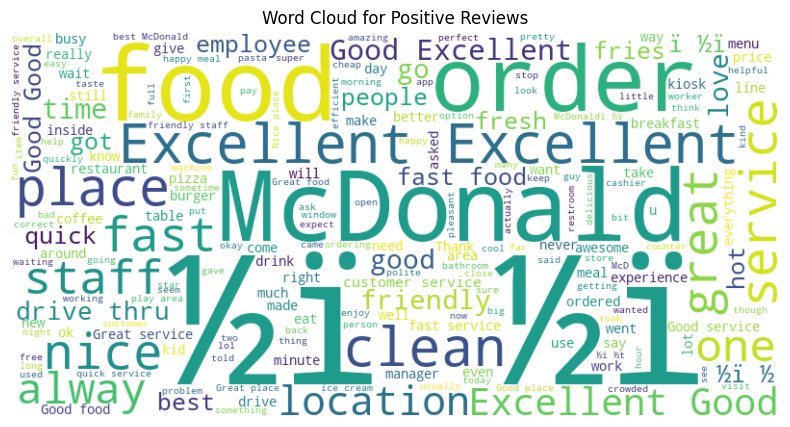

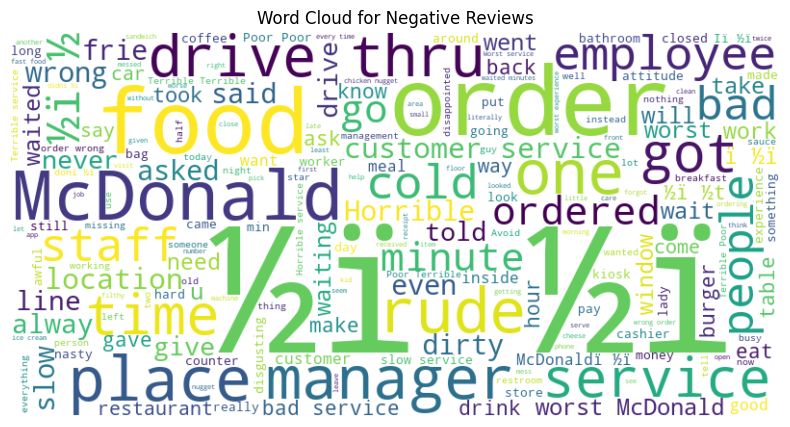

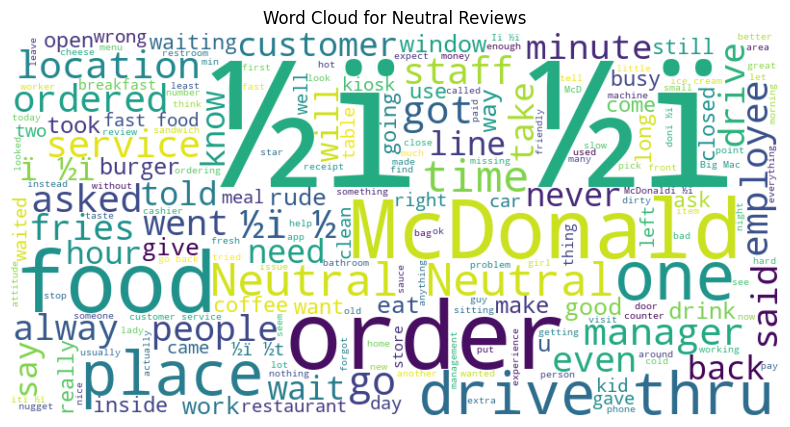

In [22]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)